# HW1: Linear Regression Example (工作經驗到底付多少薪水)

# Step1: Import Data and Observe Data

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("dataset.csv")
'''
df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None, sep='\s+')
'''
print(data.head())
type(data)
'''
data.head()
print(data.info())
len(data)
print(data.describe())
'''
print(data.columns)

   experience  salary
0         0.5    2500
1         0.0    2250
2         1.0    2750
3         5.0    8000
4         8.0    9000
Index(['experience', 'salary'], dtype='object')


0      0.5
1      0.0
2      1.0
3      5.0
4      8.0
5      4.0
6     15.0
7      7.0
8      3.0
9      2.0
10    12.0
11    10.0
12    14.0
13     6.0
Name: experience, dtype: float64
0      2500
1      2250
2      2750
3      8000
4      9000
5      6900
6     20000
7      8500
8      6000
9      3500
10    15000
11    13000
12    18000
13     7500
Name: salary, dtype: int64


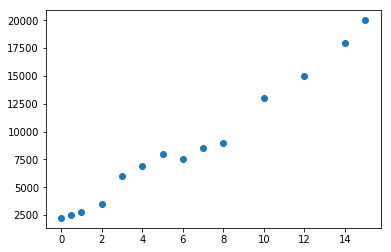

In [83]:
x=data.experience
y =data.salary
print(x)
print(y)
plt.scatter(x,y)

In [84]:
print(x)
print(type(x))
len(x)

0      0.5
1      0.0
2      1.0
3      5.0
4      8.0
5      4.0
6     15.0
7      7.0
8      3.0
9      2.0
10    12.0
11    10.0
12    14.0
13     6.0
Name: experience, dtype: float64
<class 'pandas.core.series.Series'>


14

# Step2: Feture Engineering (Data PreProcessing=data missing, outlier, normalization, find efficient features, split training and validation set, test set )

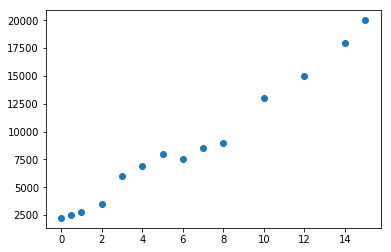

In [85]:
plt.scatter(x,y)

            experience  salary
experience      1.0000  0.9887
salary          0.9887  1.0000


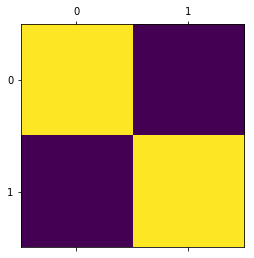

In [86]:
print(data.corr())
plt.matshow(data.corr())
plt.show()

## Step2.1 Prepare x, y fetures and labels for sklearn

In [87]:

x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)

print(type(x))
print(x.shape)
print(type(y))
print(y.shape)


<class 'numpy.ndarray'>
(14, 1)
<class 'numpy.ndarray'>
(14, 1)


# Step 3: Build Prediction Model

In [89]:
from sklearn.linear_model import LinearRegression as LR
model = LR()
model.fit(x,y)
pre = model.predict(x)

'''
print(model)
a=model.intercept_
b=model.coef_
'''

'\nprint(model)\na=model.intercept_\nb=model.coef_\n'

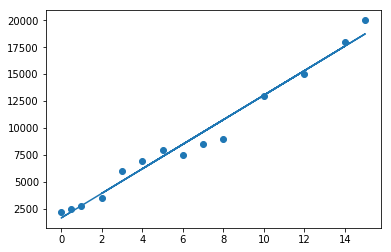

In [91]:
plt.scatter(x,y)
plt.plot(x,pre)

# Step 4: Performance Evaluation

In [98]:
model.score(x,y)


0.9775283164949903

# Contents
1. [Importing Libraries and Packages](#p1)
2. [Loading and Viewing Data Set](#p2)
3. [Plotting and Visualizing Data](#p3)
4. [Modeling and Predicting with sklearn](#p4)

<a id="p1"></a>
# 1. Importing Libraries and Packages
We will use these packages to help us manipulate the data and visualize the features/labels as well as measure how well our model performed. Numpy and Pandas are helpful for manipulating the dataframe and its columns and cells. We will use matplotlib along with Seaborn to visualize our data.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting data
import seaborn as sns # Advanced visualization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

<a id="p2"></a>
# 2. Loading and Viewing Data Set
With Pandas, we can load both the training and testing set that we wil later use to train and test our model. Before we begin, we should take a look at our data table to see the values that we'll be working with. We can use the head and describe function to look at some sample data and statistics.

In [ ]:
data = pd.read_csv('../input/linear-regression-dataset.csv')

In [ ]:
data

In [ ]:
data.info

In [ ]:
data.describe()

Showing first 5 column

In [ ]:
data.head(5)

Showing last five columns

In [ ]:
data.tail()

In [ ]:
data.corr()

<a id="p3"></a>
# 3. Plotting and Visualizing Data

Plotting the data with matplotlib scatter

In [ ]:
plt.scatter(data.experience, data.salary)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

Plotting data with subplot

In [ ]:
data_plot = data.loc[:,["experience","salary"]]
data_plot.plot()

In [ ]:
data.plot(kind = "hist",y = "experience",bins = 50,range= (0,50),normed = True)

> **Seaborn**

Heatmapping with Seaborn 

In [ ]:
f,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

<a id="p4"></a>
# 4 Model Fitting, Optimizing, and Predicting
Now that our data has been processed and formmated properly, and that we understand the general data we're working with as well as the trends and associations, we can start to build our model. We can import different classifiers from sklearn. 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg = LinearRegression()
x = data.experience.values.reshape(-1,1)
y = data.salary.values.reshape(-1,1)

Fitting the data

In [ ]:
linear_reg.fit(x,y)

Predicting twenty years experience salary

In [ ]:
next_salary = linear_reg.predict([[20]])
print(next_salary)